In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# import Housing.csv
df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Preprocessing

We want to convert 'yes' and 'no' values to 1 and 0 resp.

We want to convert furnishingstatus column categories to 0,1,2 


In [3]:
#Data preprocessing

df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0) 

df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


# Simple Linear Regression

In [4]:
#simple regression model with 'area' as a predictor variable

x1 = df["area"]
y=df["price"]

x1 = x1.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x1,y)
y_pred = model.predict(x1)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print (MSE)
print (R2)



2488861398180.657
0.2872931546811468


In [5]:
#list to store number of predictor variables
predictors=[]

#list to store model scores
MSE_scores=[]
R2_scores=[]

predictors.append(1)
MSE_scores.append(MSE)
R2_scores.append(R2)

# Multivariate Linear Regression

In [6]:
#multivariate regression model with two predictor variables: 'area' 'bedroom'

x2 = df[['area','bedrooms']]
x2=x2.to_numpy().reshape(-1,2)

#train model
model = LinearRegression()
model.fit(x2,y)
y_pred = model.predict(x2)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print (MSE)
print (R2)

predictors.append(2)
MSE_scores.append(MSE)
R2_scores.append(R2)

2198317652852.9524
0.37049285246705077


In [7]:
#multivariate regression model with four predictor variables

x4 = df[['area','bedrooms','bathrooms','stories']]
x4=x4.to_numpy().reshape(-1,4)

#train model
model = LinearRegression()
model.fit(x4,y)
y_pred = model.predict(x4)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print (MSE)
print (R2)

predictors.append(4)
MSE_scores.append(MSE)
R2_scores.append(R2)

1621756667747.2422
0.5355960442835979


In [8]:
#multivariate regression model with all twelve predictor variables

x_all = df.loc[:, df.columns != 'price']
x_all=x_all.to_numpy().reshape(-1,12)

#train model
model = LinearRegression()
model.fit(x_all,y)
y_pred = model.predict(x_all)

MSE= mean_squared_error(y, y_pred)
R2= r2_score(y, y_pred)

print (MSE)
print (R2)

predictors.append(12)
MSE_scores.append(MSE)
R2_scores.append(R2)


1117238565479.8247
0.680069137617004


### MSE and R2 Plots across number of predictor variables

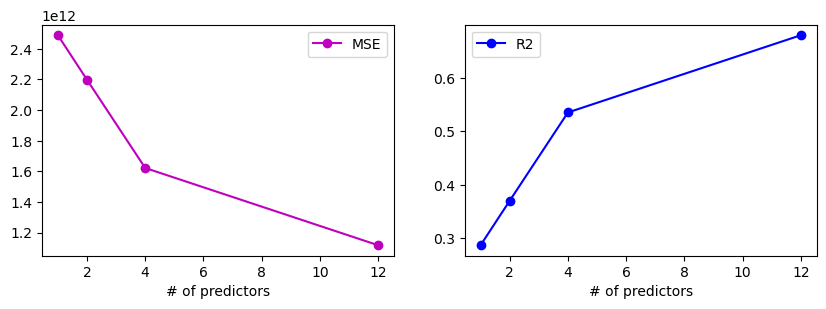

In [11]:
#plot MSE and R2 across number of predictor variables

fig, (ax, bx) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

ax.plot(predictors, MSE_scores, '-o', color='m', label='MSE')
bx.plot(predictors, R2_scores, '-o', color='b',label='R2')

ax.set_xlabel("# of predictors")
bx.set_xlabel("# of predictors")

ax.legend()
bx.legend()